# ERB: The <font color=purple>**The Joker**</font> vs <font color=red>**Pennywise**</font> - Definitive analysis 
Following up from an earlier attempt at an ERB comment section analysis markdown for this video: https://www.youtube.com/watch?v=R2WxaeIJcqY 

I've now been able to download all of the comments to date (06-2021). Which is nearly 96K comments. <br>
A far-cry more than the mere fraction 1%/2,100 comments I worked with earlier for this video. 
<br>
I would now like to present the updated analysis of ERB's <font color=purple>**The Joker**</font> vs <font color=red>**Pennywise**</font> rap battle. 
**Who (actually) won?** 
<br>
As a bonus, I look into *who's next*. I investigate using the comments, who you wanted to be the next combatants in a future ERB video. 

In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np 
import pyreadr

# import the data from an RDS file 
res = pyreadr.read_r('/Users/s1756562/Joker_versus_Pennywise_96K.rds')
JvP_df = res[None] 
# head & tail Joker vs Pennywise dataframe
JvP_df

,Comment,Author,Posted,Votes
0,The guy playing Joker really nailed it,TheRedGlint4427,2 days ago,1
1,I don't know why but I really love the deliver...,TheRedGlint4427,2 days ago,1
2,I would be ok if Peter legit played a Joker. P...,Knuckles The Echidna,1 day ago,0
3,Do Spider-Man vs green goblin,BB gaming channel,1 day ago,0
4,In my opinion Pennywise took the win with his ...,DWYDTFALLOUT GAMING,1 day ago,0
...,...,...,...,...
95922,Yes!?!?! Moorrrreeee,Sully Shaheed,1 year ago,0
95923,10 views 35 likes? Ok,Bacon Danglers,1 year ago,0
95924,Awesome as always!!!,Shai Demri,1 year ago,0
95925,No one cares,Nooby Natter,1 year ago,0


## Initial tallying of supportive comments for <font color=purple>**The Joker**</font> and <font color=red>**Pennywise**</font>
Firstly we look for comments which simply answered the question 'Who won?'.<br>
We look for exact matches in the comments for both  <font color=purple>**The Joker**</font> and <font color=red>**Pennywise**</font>, no reasons or arguments for the choice. 

In [2]:
# subset the Comment column of the dataframe
JvP_comments = JvP_df.iloc[:,0]

# Joker words
JK_words = ['joker','Joker','The joker','The Joker','the joker','the Joker','joker.',
            'Joker.','The joker.','The Joker.','the joker.','the Joker.']
# search for comments supportive only of the joker. 
JK_rows=[]
for word in JK_words:
    tmp=JvP_df[JvP_df['Comment'] == word]
    tmp=tmp.index.values
    JK_rows.append(tmp)
    
# concatenate indexes of all comments which contain the Joker support words
JK_rows = np.concatenate(JK_rows,axis=0)
# View what it looks like in the comment column 
JvP_comments[JK_rows]

418           joker
1078          joker
1781          joker
2181          joker
2228          joker
            ...    
86093        Joker.
89958        Joker.
60678    The joker.
83404    The joker.
62133    The Joker.
Name: Comment, Length: 1274, dtype: object

In [3]:
# Cross-tabulate these results
pd.crosstab(JvP_comments[JK_rows], columns = 'Count', margins = True)

col_0,Count,All
Comment,,
Joker,1020,1020
Joker.,36,36
The Joker,28,28
The Joker.,1,1
The joker,34,34
The joker.,2,2
joker,143,143
the Joker,1,1
the joker,9,9


In [4]:
## Repeat the same process for Pennywise
PW_words = ['Pennywise','pennywise','Penny wise','penny wise',
            'IT','Pennywise.','pennywise.','Penny wise.','penny wise.','IT.']
PW_rows=[]
for word in PW_words:
    tmp=JvP_df[JvP_df['Comment'] == word]
    tmp=tmp.index.values
    PW_rows.append(tmp)

PW_rows = np.concatenate(PW_rows,axis=0)
JvP_comments[PW_rows]

53         Pennywise
167        Pennywise
199        Pennywise
345        Pennywise
433        Pennywise
            ...     
89221     Pennywise.
94051     Pennywise.
2821      pennywise.
51957    Penny wise.
86912    Penny wise.
Name: Comment, Length: 785, dtype: object

In [5]:
# Cross-tabulate Pennywise supportive comments 
pd.crosstab(JvP_comments[PW_rows], columns = 'Count', margins = True)

col_0,Count,All
Comment,,
IT,42,42
Penny wise,80,80
Penny wise.,2,2
Pennywise,547,547
Pennywise.,12,12
penny wise,11,11
pennywise,90,90
pennywise.,1,1
All,785,785


### So far, <font color=purple>**The Joker**</font> is in the lead with 1,274 supportive comments vs 785 for <font color=red>**Pennywise**</font>. 
Now it's time for a more nuanced approach. 
Most of the comments are not simply 'Pennywise' or 'The joker'. Users typically like to express their opinion when commenting their verdict. So we'll fetch strings which contain set phrases. These phrases attempt to capture the sentiment of who the commenter thought won within their comments. <br>
The phrases we'll look for contain <br>
 - Pennywise/The Joker 
 - won/wins/winner   
<br>

For example, a comment that reads: > 'They were both amazing, but I think The Joker won.'
    
We will recognise this as a Joker supportive comment with the substring 'Joker won'. 
<br>
An example phrase we wouldn't recognise is: > 'Close call, Though I think Pennywise clenched the victory.'
    
While this is explicitly a pro-Pennywise verdict. The substrings we're looking for wouldn't pick up this comment. 

In [6]:
#Find any comment with the following substrings 
# 'Pennywise won', 'Pennywise wins', 'Pennywise winner', 'IT won', 'IT wins', 'IT winner', 'pennywise won'
# 'pennywise wins', 'pennywise winner', 'winner: pennywise', 'winner: Pennywise'
PW_comments = JvP_df.apply(lambda row: row.astype(str).str.contains('Pennywise won|Pennywise wins|Pennywise winner|IT won|IT wins|IT winner|pennywise won|pennywise wins|pennywise winner|winner: pennywise|winner: Pennywise|penny wise won|penny wise wins|penny wise winner|Penny wise won|Penny wise wins|Penny wise winner'))
PW_comments_index = np.where(PW_comments)[0]
PW_comments = JvP_df.iloc[np.append(PW_comments_index,PW_rows),[0]]
PW_comments

,Comment
16,Pennywise won
49,Penny wise won ^^
151,"Pennywise won, but he's going to have to limp ..."
161,Pennywise won
163,The Edgar Allen Poe reference was amazing... P...
...,...
89221,Pennywise.
94051,Pennywise.
2821,pennywise.
51957,Penny wise.


In [7]:
#'Joker won','Joker wins','Joker winner','joker won','joker wins','joker winner','winner: Joker','winner: joker'
JK_comments = JvP_df.apply(lambda row: row.astype(str).str.contains('Joker won|Joker wins|Joker winner|joker won|joker wins|joker winner|winner: Joker|winner: joker'))
JK_comments_index = np.where(JK_comments)[0]
JK_comments = JvP_df.iloc[np.append(JK_comments_index,JK_rows),[0]]
JK_comments

,Comment
12,Joker won
45,Is probably the best one yet. I think joker won.
57,Joker won!!!!!
59,joker won
62,I like pennywise but joker was really good so ...
...,...
86093,Joker.
89958,Joker.
60678,The joker.
83404,The joker.


In [8]:
all_JKrows = np.append(JK_comments_index, JK_rows)
all_PWrows = np.append(PW_comments_index, PW_rows)

PW_df = JvP_df.iloc[all_PWrows,[0,1,2,3]]
JK_df = JvP_df.iloc[all_JKrows,[0,1,2,3]]
## what the Joker supportive comments look like in context of whole dataset 
#JK_df

In [9]:
## what Pennywise supportive comments look like in context of whole dataset 
#PW_df

In [10]:
# removing duplicate commentors from supportive comments for each candidate 
JK_df = JK_df.drop_duplicates(subset='Author', keep = 'first')
JK_df
# going from 6316 rows to 
# 6216 rows. 100 duplicate commentors subtracted. 

,Comment,Author,Posted,Votes
12,Joker won,Proe1,1 day ago,0
45,Is probably the best one yet. I think joker won.,Brandon Harris,5 days ago,2
57,Joker won!!!!!,Mathew Kennedy,4 days ago,0
59,joker won,Clout God,4 days ago,0
62,I like pennywise but joker was really good so ...,weeeeeeeee are the beest,3 days ago,0
...,...,...,...,...
86093,Joker.,Matthew S,1 year ago,0
89958,Joker.,Alex Ortiz,1 year ago,0
60678,The joker.,Aurora Rose,1 year ago,0
83404,The joker.,Zack,1 year ago,0


In [11]:
# Pennywise data, going from 2948 
PW_df = PW_df.drop_duplicates(subset='Author', keep = 'first')
PW_df
# to 2892
# 56 duplicate comments dropped. 

,Comment,Author,Posted,Votes
16,Pennywise won,YT Rapido,15 hours ago,0
49,Penny wise won ^^,Muhammedlee,5 days ago,0
151,"Pennywise won, but he's going to have to limp ...",OtterWithAGun,1 week ago,0
161,Pennywise won,Converse Montana,1 week ago,0
163,The Edgar Allen Poe reference was amazing... P...,CS Hill,1 week ago,0
...,...,...,...,...
89221,Pennywise.,Relics,1 year ago,0
94051,Pennywise.,Bababouille,1 year ago,0
2821,pennywise.,Sandra Spurlock,5 months ago,0
51957,Penny wise.,Jalen Hyman,1 year ago,0


# WHO WON?! 
We're about to find out! 
Totalling all comments for both contestants while removing duplicates. 

Text(0.5, 1.0, 'ERB: The Joker vs Pennywise')

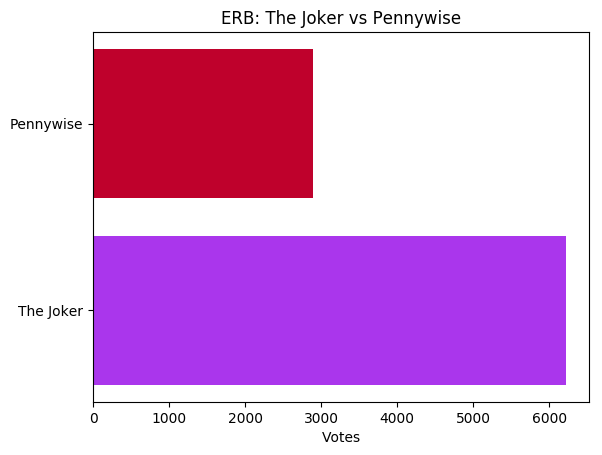

In [12]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
contestants = ('The Joker','Pennywise')
votes = [len(JK_df),len(PW_df)]

plt.barh(contestants, votes, align='center', alpha=1, color=('#AA36EC','#BF012C'))
plt.xlabel('Votes')
plt.title('ERB: The Joker vs Pennywise')

## <font color=purple>**The Joker Won**</font>
With **6,216 comments** for <font color=purple>**The Joker**</font>  vs **2,892 comments** for <font color=red>**Pennywise**.</font> <br> 
The Joker received 115% more votes than Pennywise.

### Next we can look at how many upvotes these comments have.  

In [13]:
## Tallying upvotes on comments supportive for Joker & Pennywise. 
# Joker has two comments with 4K and 2.8K upvotes. 
JvP_df.iloc[8344,:]

Comment    Joker won this, but the actor who played Penny...
Author                                    GrapplingIgnorance
Posted                                          9 months ago
Votes                                                     4K
Name: 8344, dtype: object

In [14]:
JvP_df.iloc[14394,:]

Comment    Joker wins this because if and when he dies, h...
Author                                               Shageru
Posted                                            1 year ago
Votes                                                   2.8K
Name: 14394, dtype: object

In [15]:
JK_votes = JK_df.iloc[:, 3]
JK_votes = JK_votes.tolist()
#JK_votes.index('K')
[s for s in JK_votes if 'K' in s]
#JK_votes.index('4K') #441
#JK_votes.index('2.8K') #751
indices = 441, 751
JK_votes = [i for j, i in enumerate(JK_votes) if j not in indices]
JK_votes = list(map(int, JK_votes))
sum(JK_votes)

29672

In [16]:
PW_votes = PW_df.iloc[:, 3]
PW_votes = PW_votes.tolist()
PW_votes = list(map(int, PW_votes))
sum(PW_votes)

2272

Text(0.5, 1.0, 'ERB: The Joker vs Pennywise')

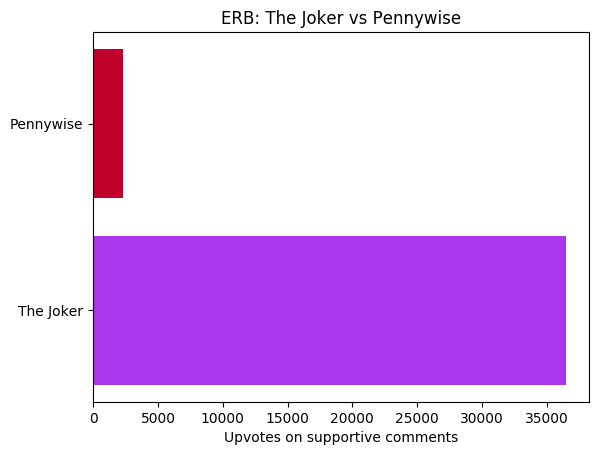

In [17]:
contestants = ('The Joker','Pennywise')
# add the 4K and 2.8K to Joker
JK_votes2 = sum(JK_votes) + 4000 + 2800
PW_votes2 = sum(PW_votes)
votes2 = [JK_votes2,PW_votes2]

plt.barh(contestants, votes2, align='center', alpha=1, color=('#AA36EC','#BF012C'))
plt.xlabel('Upvotes on supportive comments')
plt.title('ERB: The Joker vs Pennywise') 

## The <font color=purple>**The Joker**</font>comments received substantially more upvotes than <font color=red>**Pennywise**</font> comments 
Around **1,206%** more upvotes in total.  

# WHO'S NEXT?! 
Now let's try shed some light as to who the commenters wanted featured in future ERB videos. 

In [18]:
# capturing all comments with 'Vs','VS','vs' as substrings
VS_comments = JvP_df.apply(lambda row: row.astype(str).str.contains('vs|Vs|VS'))
VS_comments_index = np.where(VS_comments)[0]
VS_comments = JvP_df.iloc[VS_comments_index,[0]]
VS_comments

,Comment
3,Do Spider-Man vs green goblin
17,Batman vs flash
21,"That wouldn't make any sense, green goblin vs ..."
33,Jigsaw Vs Joker. I'd love to see that one go d...
47,Plz Abraham Lincoln vs George Washington
...,...
95855,Kevin from home alone vs jigsaw
95868,The clown prince of crime vs the red ballonest
95873,Mr Bean vs Jim Carrey
95883,CHARLEMAGNE VS BISMARK


In [19]:
# cross-tabulate the votes for next combatants
VS_tab = pd.crosstab(JvP_comments[VS_comments_index], columns = 'Count', margins = True)
VS_tab = VS_tab.sort_values('Count', ascending = False)
VS_tab.head(20)

col_0,Count,All
Comment,,
All,17306,17306
Messi vs Ronaldo,15,15
Thanos vs Darkseid,14,14
John Wick vs Agent 47,13,13
Batman vs superman,11,11
Chucky vs Annabelle,9,9
Batman vs iron man,9,9
Homer Simpson vs Peter Griffin,9,9
Indiana Jones vs Han Solo,8,8


Looked at it in this way, Messi and Ronaldo appear the most requested. However, We have various iterations of Batman vs Ironman. Such as Batman vs Ironman (7) + Batman vs iron man (9) + Ironman vs Batman (6) = 22. Perhaps another way to address this question 

In [20]:
VS_comments = JvP_comments[VS_comments_index]

# Mentions of Batman as a contestant 
batman = VS_comments.str.contains('Batman|batman')
batman_index = np.where(batman)[0]
#batman_index

# Mentions of John Wick as a contestant 
JW = VS_comments.str.contains('John wick|john wick|John Wick')
JW_index = np.where(JW)[0]

# Mentions of Agent 47 as a contestant 
A47 = VS_comments.str.contains('Agent 47|Agent47|agent 47|agent 47')
A47_index = np.where(A47)[0]

# Mentions of Superman as a contestant
SM = VS_comments.str.contains('Superman|superman|Super man|super man')
SM_index = np.where(SM)[0]

# Mentions of Spiderman as a contestant
Spi = VS_comments.str.contains('Spiderman|spiderman|Spider man|spider man')
Spi_index = np.where(Spi)[0]

# Mentions of Ironman as a contestant
IM = VS_comments.str.contains('Ironman|ironman|Iron man|iron man')
IM_index = np.where(IM)[0]

# Mentions of Messi (footballer) as a contestant
mes = VS_comments.str.contains('Messi|messi')
mes_index = np.where(mes)[0]

# Mentions of Ronaldo (footballer) as a contestant
Ron = VS_comments.str.contains('Ronaldo|ronaldo')
Ron_index = np.where(Ron)[0]

# Mentions of Sonic (the Hedgehog) as a contestant
Son = VS_comments.str.contains('Sonic|sonic')
Son_index = np.where(Son)[0]

# Mentions of Mario (Nintendo, Plumber) as a contestant
Mar = VS_comments.str.contains('Mario|Mario')
Mar_index = np.where(Mar)[0]

Text(0.5, 1.0, "ERB: The Joker vs Pennywise - Who's next!? You decide!")

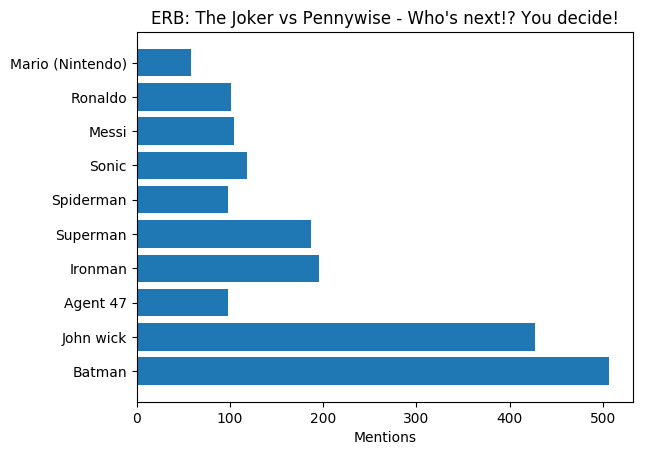

In [21]:
next_contestants = ('Batman','John wick','Agent 47','Ironman','Superman','Spiderman','Sonic',
                    'Messi','Ronaldo','Mario (Nintendo)')
bat_votes = len(batman_index)
JW_votes = len(JW_index)
A47_votes = len(A47_index)
IM_votes = len(IM_index)
SM_votes = len(SM_index)
Spi_votes = len(Spi_index)
Sonic_votes = len(Son_index)
Mario_votes = len(Mar_index)
Messi_votes = len(mes_index)
Ronaldo_votes = len(Ron_index)

mentions = [bat_votes, JW_votes,A47_votes, IM_votes, SM_votes, Spi_votes, Sonic_votes, Messi_votes, Ronaldo_votes,Mario_votes]

plt.barh(next_contestants, mentions, align='center', alpha=1)
plt.xlabel('Mentions')
plt.title('ERB: The Joker vs Pennywise - Who\'s next!? You decide!')

### Based on this, Batman is the most popular contestant. <br>
However, he's already featured in an ERB vs Sherlock :https://www.youtube.com/watch?v=17CLlZuiBkQ. <br>
So next in line is **John Wick**. <br>
Who might he be facing? 

In [22]:
np_df = VS_comments.as_matrix()
JWvs = np_df[JW_index]
JW_tab = pd.crosstab(JWvs, columns = 'Count', margins = True)
JW_tab = JW_tab.sort_values('Count', ascending = False)
JW_tab.head(15)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


col_0,Count,All
row_0,,
All,427,427
John Wick vs Agent 47,13,13
John Wick vs Neo,8,8
Agent 47 vs John Wick,7,7
John wick vs agent 47,6,6
John Wick vs Hitman,5,5
John wick vs Agent 47,5,5
John wick vs Rambo,4,4
John Wick vs Rambo,4,4


Well. It looks like <br>
- **Agent 47** from the Hitman franchise *(total: 32)* 
- **John Rambo** *(total: 14)*  

I can already see NicePeter as naturally playing the role of John Wick and EpicLLOYD would make an amazing Agent 47 or John Rambo. <br>
No matter who the wonderful folk at ERB choose to do in their rap battles, it will be awesome as always. <br>